In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import numpy as np

import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




# Sample

This part only used in the first time processing, that is aimed to export seeveral new, useful data sets, including the `full_data` that consists of the first 10000 records in the npy file, `heart_data`, `altitude_data`, and `speed_data`, and those three data sets are Descriptive Statistics by each record id.

Don't run the following code once you have saved the 4 csv files on the computer.

In [197]:
data = np.load("/Users/kai/Downloads/processed_endomondoHR_proper_interpolate.npy", allow_pickle=True)[0]

In [ ]:
data[0]

{'since_begin': [1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184314,
  1378478.8892184

In [ ]:
df = pd.DataFrame()

In [ ]:
for i in range(10000):
    df = pd.concat([df, pd.DataFrame(data[i])])

In [ ]:
df.head()

,since_begin,time_elapsed,latitude,gender,tar_heart_rate,timestamp,id,longitude,since_last,heart_rate,sport,altitude,derived_speed,tar_derived_speed,distance,userId
0,1.378479e+06,-0.122568,60.173349,male,100.000000,1408898746,396826535,24.649770,2158.846078,-8.197369,bike,-1.804467,-7.082944,7.105427e-15,-4.372304,10921915
1,1.378479e+06,-0.122122,60.173240,male,113.355469,1408898754,396826535,24.650143,2158.846078,-5.369012,bike,-1.818636,-2.088780,1.255489e+01,-1.797320,10921915
2,1.378479e+06,-0.121676,60.172980,male,120.214752,1408898765,396826535,24.650911,2158.846078,-3.916386,bike,-1.820717,-0.351569,1.692208e+01,-0.055967,10921915
3,1.378479e+06,-0.121230,60.172478,male,119.108221,1408898778,396826535,24.650669,2158.846078,-4.150721,bike,-1.847772,-0.680039,1.609634e+01,-0.051062,10921915
4,1.378479e+06,-0.120784,60.171861,male,120.569362,1408898794,396826535,24.649145,2158.846078,-3.841288,bike,-1.851729,-0.279256,1.710387e+01,4.282176,10921915


In [ ]:
user = df[['id','gender','sport','userId']].drop_duplicates()

Generate two new data sets for project use

In [ ]:
user.to_csv('/Users/kai/Desktop/user_data.csv')

In [ ]:
df.to_csv('/Users/kai/Desktop/full_data.csv')

## Aggregate heart data

In [ ]:
meta = df.groupby(['id']).agg({'tar_heart_rate':['min','max','mean','median','var','std']})
meta

tar_heart_rate                                                  \
                     min         max        mean      median         var   
id                                                                         
3930381       107.000000  133.188170  126.052616  127.690308   24.679526   
3933514       102.737612  147.056557  129.107529  129.824025   40.781166   
3940962       119.000000  153.203170  135.745412  135.111115   51.729728   
4632763        99.000000  144.093784  125.688475  126.154797   50.713629   
4651866        95.000000  149.000000  131.088789  131.271737   65.589959   
...                  ...         ...         ...         ...         ...   
651598821     105.000000  180.056087  153.262615  155.055382  237.087531   
651793414      92.000000  167.947758  144.486555  143.746036   76.864410   
652776545      78.000000  188.201302  148.425898  148.420723  607.459492   
656149214     104.000000  171.100294  162.785552  165.000000   74.066952   
657584281      89.532329  170.606347  144.081080  148.035233  285.101349   

                      
                 std  
id                    
3930381     4.967849  
3933514     6.386013  
3940962     7.192338  
4632763     7.121350  
4651866     8.098763  
...              ...  
651598821  15.397647  
651793414   8.767235  
652776545  24.646693  
656149214   8.606216  
657584281  16.884944  

[10000 rows x 6 columns]

In [ ]:
meta.columns = meta.columns.droplevel()

In [ ]:
meta = meta.reset_index()

In [ ]:
# meta.to_csv('/Users/kai/Desktop/heart_data.csv')

## Aggregate altitude data

In [ ]:
meta_al = data.groupby(['id']).agg({'altitude':['min','max','mean','median','var','std']})
meta_al

altitude                                                   
                min        max      mean    median       var       std
id                                                                    
3930381   -2.274128  -1.951918 -2.117251 -2.119646  0.006619  0.081360
3933514   -2.413336  -1.563304 -2.087596 -2.120396  0.028579  0.169054
3940962   -2.391011  -1.352288 -2.109420 -2.256160  0.089336  0.298892
4632763   -1.752364  -1.295748 -1.636443 -1.659474  0.009159  0.095702
4651866   -2.218926  -1.546072 -1.983237 -2.056175  0.033427  0.182830
...             ...        ...       ...       ...       ...       ...
651598821 -2.495599  -1.458820 -2.022786 -1.958346  0.113292  0.336589
651793414  0.920737   1.192892  1.059817  1.062778  0.006510  0.080686
652776545  7.901693   8.254716  8.017489  7.993179  0.007225  0.085002
656149214  8.998983  10.753798  9.793342  9.657995  0.362602  0.602164
657584281 -2.447059   1.716663 -0.614704 -1.075103  2.207662  1.485820

[10000 rows x 6 columns]

In [ ]:
meta_al.columns = meta_al.columns.droplevel()
meta_al = meta_al.reset_index()
# meta_al.to_csv('/Users/kai/Desktop/altitude_data.csv')

Aggregate Speed

In [ ]:
data = pd.read_csv("/Users/kai/Course/Data100/full_data.csv", index_col=0)
meta_speed = data.groupby(['id']).agg({'derived_speed':['min','max','mean','median','var','std']})

In [ ]:
meta_speed.columns = meta_speed.columns.droplevel()
meta_speed.reset_index().to_csv('/Users/kai/Course/Data100/speed_data.csv')

# Clustering Analysis

## Data preparation

In this sector, I want to have clean data sets with import variables to portain their sport behavior and health status. The granularity of the final data set would be the user, specifically, the median of each exercise of each user. And the variables I need are max heart rate `heart_max`, differences of the altitude in a period of time  `altitude_diff`, average speed in a period of time `speed_mean`, and `gender`.

In [2]:
data = pd.read_csv("/Users/kai/Course/Data100/full_data.csv", index_col=0)
data = data[data['gender'] != 'unknown']

drop the data points with unvalid gender

Merge `data` to the existing three data sets of the statistics for each exercise.

In [3]:
alt_data = pd.read_csv("/Users/kai/Course/Data100/altitude_data.csv", index_col=0)
heart_data = pd.read_csv("/Users/kai/Course/Data100/heart_data.csv", index_col=0)
speed_data = pd.read_csv("/Users/kai/Course/Data100/speed_data.csv", index_col=0)

In [4]:
data.head()

,since_begin,time_elapsed,latitude,gender,tar_heart_rate,timestamp,id,longitude,since_last,heart_rate,sport,altitude,derived_speed,tar_derived_speed,distance,userId
0,1.378479e+06,-0.122568,60.173349,male,100.000000,1408898746,396826535,24.649770,2158.846078,-8.197369,bike,-1.804467,-7.082944,7.105427e-15,-4.372304,10921915
1,1.378479e+06,-0.122122,60.173240,male,113.355469,1408898754,396826535,24.650143,2158.846078,-5.369012,bike,-1.818636,-2.088780,1.255489e+01,-1.797320,10921915
2,1.378479e+06,-0.121676,60.172980,male,120.214752,1408898765,396826535,24.650911,2158.846078,-3.916386,bike,-1.820717,-0.351569,1.692208e+01,-0.055967,10921915
3,1.378479e+06,-0.121230,60.172478,male,119.108221,1408898778,396826535,24.650669,2158.846078,-4.150721,bike,-1.847772,-0.680039,1.609634e+01,-0.051062,10921915
4,1.378479e+06,-0.120784,60.171861,male,120.569362,1408898794,396826535,24.649145,2158.846078,-3.841288,bike,-1.851729,-0.279256,1.710387e+01,4.282176,10921915


In [5]:
heart_data.head()

,id,min,max,mean,median,var,std
0,3930381,107.000000,133.188170,126.052616,127.690308,24.679526,4.967849
1,3933514,102.737612,147.056557,129.107529,129.824025,40.781166,6.386013
2,3940962,119.000000,153.203170,135.745412,135.111115,51.729728,7.192338
3,4632763,99.000000,144.093784,125.688475,126.154797,50.713629,7.121350
4,4651866,95.000000,149.000000,131.088789,131.271737,65.589959,8.098763


In [6]:
alt_data['diff'] = alt_data['max'] - alt_data['min']

In [7]:
data_selected= data[['gender','sport','altitude','derived_speed','id','userId']]
data_merged = (
    data_selected.merge(heart_data[['max','id','std']], on='id')
    .merge(alt_data[['diff','std','id']], on='id')
    .merge(speed_data[['mean','std','id']], on='id')
)

In [8]:
data_merged = data_merged.rename({'diff':'alt_diff','max':'heart_max','mean':'speed_mean'}, axis=1)

In [9]:
data_merged

,gender,sport,altitude,derived_speed,id,userId,heart_max,std_x,alt_diff,std_y,speed_mean,std
0,male,bike,-1.804467,-7.082944,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836
1,male,bike,-1.818636,-2.088780,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836
2,male,bike,-1.820717,-0.351569,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836
3,male,bike,-1.847772,-0.680039,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836
4,male,bike,-1.851729,-0.279256,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836
...,...,...,...,...,...,...,...,...,...,...,...,...
2977195,male,bike,-0.064222,-0.209647,176731991,331586,160.945059,14.183650,0.571151,0.140918,-0.413759,2.906451
2977196,male,bike,-0.078347,-1.329734,176731991,331586,160.945059,14.183650,0.571151,0.140918,-0.413759,2.906451
2977197,male,bike,-0.105896,-0.006515,176731991,331586,160.945059,14.183650,0.571151,0.140918,-0.413759,2.906451
2977198,male,bike,-0.124999,-3.231240,176731991,331586,160.945059,14.183650,0.571151,0.140918,-0.413759,2.906451


Now, let's preprocess categorical variables `sport`, into dummy variables.

In [10]:
categorical = ['sport']
df_dummies = pd.get_dummies(data_merged[categorical], columns=categorical)
data_merged = data_merged.drop(categorical, axis = 1)
data_merged = data_merged.replace({'male':1, 'female':0}).merge(df_dummies, left_index = True, right_index= True)

In [11]:
data['sport'].value_counts()

bike                       1416000
run                        1196100
mountain bike               213600
bike (transport)             62700
orienteering                 48900
walk                         10800
indoor cycling                8100
cross-country skiing          4800
core stability training       3300
rowing                        3300
hiking                        3000
kayaking                      2400
circuit training              2400
soccer                         600
tennis                         300
basketball                     300
skate                          300
weight training                300
Name: sport, dtype: int64

In [12]:
data_merged = data_merged.drop(['altitude','derived_speed'],axis=1).drop_duplicates()

Let's label the heart_max over 180 as risky heart rates.

In [13]:
data_merged['heart_risk'] = data_merged['heart_max']>180
data_merged['heart_risk'] = data_merged['heart_risk'].astype('int')

In [116]:
data_merged

,gender,id,userId,heart_max,std_x,alt_diff,std_y,speed_mean,std,sport_basketball,...,sport_mountain bike,sport_orienteering,sport_rowing,sport_run,sport_skate,sport_soccer,sport_tennis,sport_walk,sport_weight training,heart_risk
0,1,396826535,10921915,169.177154,10.119547,0.767201,0.226943,2.889815,2.510836,0,...,0,0,0,0,0,0,0,0,0,0
300,1,392337038,10921915,172.577113,11.186082,0.726726,0.154062,3.310221,2.830463,0,...,0,0,0,0,0,0,0,0,0,0
600,1,389643739,10921915,162.156270,10.289886,0.668623,0.159920,2.280061,2.919536,0,...,0,0,0,0,0,0,0,0,0,0
900,1,386729739,10921915,178.140847,12.028911,0.758043,0.164667,3.436977,3.005276,0,...,0,0,0,0,0,0,0,0,0,0
1200,1,372368431,10921915,157.212850,13.193648,0.435232,0.111841,2.081560,2.453061,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975700,1,179541176,331586,166.025730,17.988476,0.688984,0.188743,0.974516,4.348646,0,...,0,0,0,0,0,0,0,0,0,0
2976000,1,179540799,331586,162.320343,7.113997,0.209992,0.053109,-2.964418,0.498286,0,...,0,0,0,1,0,0,0,0,0,0
2976300,1,178495706,331586,172.024154,11.566740,0.170236,0.039346,-2.131020,0.931947,0,...,0,0,0,1,0,0,0,0,0,0
2976600,1,176731930,331586,186.336447,16.392756,0.884187,0.222878,-3.330440,19.649112,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
X = data_merged.drop(['id','userId','heart_max','heart_risk'],axis=1)
y = data_merged['heart_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train[:]

,gender,std_x,alt_diff,std_y,speed_mean,std,sport_basketball,sport_bike,sport_bike (transport),sport_circuit training,...,sport_kayaking,sport_mountain bike,sport_orienteering,sport_rowing,sport_run,sport_skate,sport_soccer,sport_tennis,sport_walk,sport_weight training
390600,1,6.631605,0.215063,0.046746,-2.692430,0.544458,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1844400,1,12.941896,1.758425,0.405411,-2.265545,0.931623,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2471100,1,11.558490,0.463067,0.083175,8.996960,2.885595,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2365800,1,9.411876,1.444414,0.528165,2.322927,3.378014,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2744100,1,18.481579,3.849187,1.126091,1.714599,6.072005,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720200,1,22.434826,0.594080,0.195675,-2.486322,7.430934,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1557300,1,17.726846,0.674364,0.173670,-4.023859,1.381357,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1617000,1,13.424453,0.551636,0.107820,3.804666,3.441075,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
258000,1,15.614705,0.325232,0.068716,4.821659,1.893535,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Built a RF model

In [18]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import r2_score as r2


rfc_100 = RandomForestClassifier(n_estimators=300, random_state=90)

rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 300 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 300 decision-trees : 0.9002


The data scattered unevenly among different sort of sports. So, I would only focus on the top three sports, `bike`, `run`, and `mountain bike`, otherwise there woould be too few data points to perform clustering analysis

function `sport_subset` and `agg_median` helps us to get data set by sport and results in the users as the granularity.

In [16]:
def sport_subset(sport):
    return data_merged[data_merged[sport]==1][['id','userId','gender','speed_mean','heart_max','alt_diff']].drop_duplicates()

In [17]:
data_bike = sport_subset('sport_bike')
data_run = sport_subset('sport_run')
data_mountain_bike = sport_subset('sport_mountain bike')

In [18]:
data_bike.head()

,id,userId,gender,speed_mean,heart_max,alt_diff
0,396826535,10921915,1,2.889815,169.177154,0.767201
300,392337038,10921915,1,3.310221,172.577113,0.726726
600,389643739,10921915,1,2.280061,162.156270,0.668623
900,386729739,10921915,1,3.436977,178.140847,0.758043
1200,372368431,10921915,1,2.081560,157.212850,0.435232


In [19]:
def agg_median(data):
    data = data.groupby('userId')[['gender','speed_mean','heart_max','alt_diff']].median().reset_index()
    cat = ['speed_mean','heart_max','alt_diff']
    for i in cat:
        data[i]= (data[i]-data[i].mean())/data[i].std()
    return data

In [20]:
agg_median(data_bike).head()

,userId,gender,speed_mean,heart_max,alt_diff
0,16786,1.0,0.775573,-0.062170,0.575141
1,22260,1.0,0.716639,1.152143,0.116120
2,56291,1.0,-0.649830,-1.222555,-0.476478
3,69228,1.0,1.091222,1.205620,0.071944
4,182042,0.0,-1.362690,0.195841,-0.390095


In [21]:
user_bike = agg_median(data_bike)

In [23]:
user_bike

,userId,gender,speed_mean,heart_max,alt_diff
0,16786,1.0,0.775573,-0.062170,0.575141
1,22260,1.0,0.716639,1.152143,0.116120
2,56291,1.0,-0.649830,-1.222555,-0.476478
3,69228,1.0,1.091222,1.205620,0.071944
4,182042,0.0,-1.362690,0.195841,-0.390095
...,...,...,...,...,...
64,13276532,1.0,1.933232,0.931127,0.584110
65,13279851,1.0,0.448589,-0.126503,-0.396488
66,13469928,1.0,1.377630,0.042564,-0.322247
67,13693003,1.0,0.684712,-0.259039,0.086967


In [22]:
user_run = agg_median(data_run)

The `bike` data set have 69 users and each column records the median of the corresponding variable in all their exercises. For example, the column `speed_mean` refers to the median of the average speed of all a user's exercises, so it can be interpreted as median(avg(X)) as well. In addition, the `run` data set have 81 users and the `mountain bike` have 23 users.

## Kmeans clustering

### bike

So far only the bikers are analyzed, but the model is quite convenient to handle different sports. The concern is the description for the certain group that might with high risks of heart anomaly. Do they really would suffer some day? And what other characteristics they share in common that needs more scrutiny.

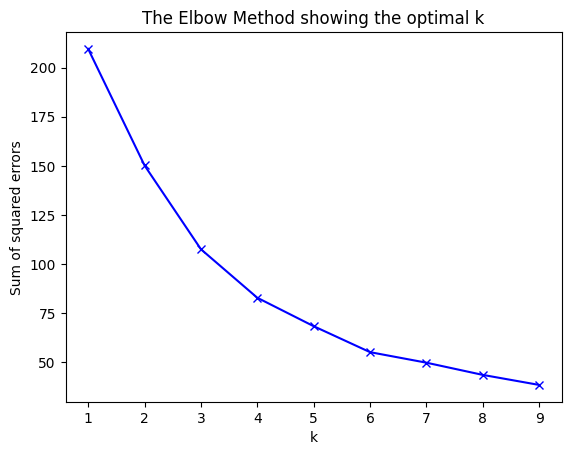

In [27]:
X = user_bike[['gender','speed_mean','heart_max','alt_diff']]

# k means determine k
SSE = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal k is 4, as it is the elbow point on the curve.


Also, we are not intended for a large k, because too many clusters cause a lot of trouble in analysis.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

user_bike['label'] = kmeans.labels_

In [29]:
np.round(kmeans.cluster_centers_,1)
# 'speed_mean','heart_max','alt_diff'

array([[ 0.9, -1. ,  0.8, -0.3],
       [ 0.9,  0.7,  0.2, -0.1],
       [ 1. , -1.4,  0.1,  3.7],
       [ 0.9, -0.5, -1.4, -0.3]])

A simple tentative analysis

row 1: low speed, high max heart rate, moderate alt diff.  This group indicates heart anomaly and entails careful analysis.

row 2: high speed, moderate max heart rate, moderate alt diff. Road biker

row 3: low speed, moderate max heart rate, high alt diff.  Maybe advanced mountain off-road biker.

row 4: moderate speed, low max heart rate, moderate alt diff. Beginner cyclist


In [30]:
user_bike['label'].value_counts()

1    36
3    15
0    15
2     3
Name: label, dtype: int64

### run

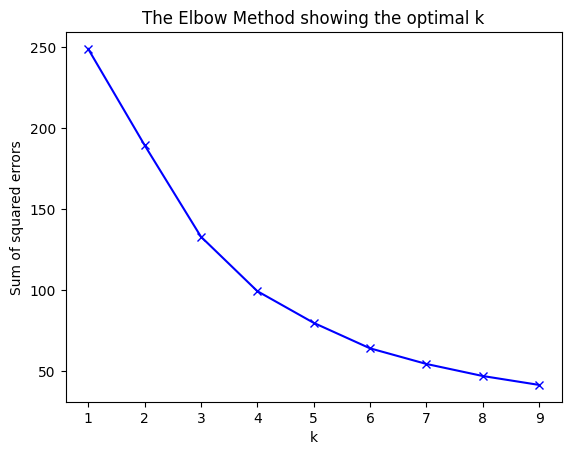

In [56]:
X = user_run[['gender','speed_mean','heart_max','alt_diff']]

# k means determine k
SSE = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

user_run['label'] = kmeans.labels_

In [58]:
np.round(kmeans.cluster_centers_,1)
# 'speed_mean','heart_max','alt_diff'

array([[ 0.8, -1.1,  0.4,  0. ],
       [ 0.9,  0.7,  0.5, -0.1],
       [ 1. ,  0.9,  0.2,  7.5],
       [ 0.9, -0.2, -1.3, -0.1]])

In [59]:
user_run['label'].value_counts()

1    38
3    21
0    21
2     1
Name: label, dtype: int64

In [63]:
user_run[user_run['label']==0]

,userId,gender,speed_mean,heart_max,alt_diff,label
3,182042,0.0,-1.907443,-0.149179,-0.354930,0
10,407769,1.0,-1.073496,0.206922,-0.128483,0
12,732008,1.0,-0.882103,0.389957,1.637182,0
23,1543833,1.0,-0.162234,0.840292,0.662823,0
26,2104631,1.0,-0.498749,-0.047256,-0.743112,0
30,2486861,1.0,-2.067687,0.158777,-0.192096,0
33,2868369,1.0,-0.247047,0.538960,-0.252214,0
37,3545637,0.0,-2.268573,1.334910,-0.213536,0
39,3680369,1.0,-0.918755,0.393764,-0.421140,0
45,4433918,1.0,-1.137088,0.668590,0.483786,0


## PCA for visualization

In [37]:
user_bike.loc[:,'gender':'label']

,gender,speed_mean,heart_max,alt_diff,label
0,1.0,0.775573,-0.062170,0.575141,1
1,1.0,0.716639,1.152143,0.116120,1
2,1.0,-0.649830,-1.222555,-0.476478,3
3,1.0,1.091222,1.205620,0.071944,1
4,0.0,-1.362690,0.195841,-0.390095,0
...,...,...,...,...,...
64,1.0,1.933232,0.931127,0.584110,1
65,1.0,0.448589,-0.126503,-0.396488,1
66,1.0,1.377630,0.042564,-0.322247,1
67,1.0,0.684712,-0.259039,0.086967,1


In [38]:
plotX = user_bike.loc[:,'gender':'label']

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = user_bike.loc[:,'gender':'label'].columns

In [39]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)


In [40]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["label"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["label"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["label"], axis=1)))

In [41]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [42]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [43]:
plotX

,gender,speed_mean,heart_max,alt_diff,label,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d
0,1.0,0.775573,-0.062170,0.575141,1,-0.203693,-0.203693,0.313536,-0.203693,0.313536,-0.894882
1,1.0,0.716639,1.152143,0.116120,1,-0.854404,-0.854404,1.061504,-0.854404,1.061504,-0.054775
2,1.0,-0.649830,-1.222555,-0.476478,3,0.617689,0.617689,-1.310135,0.617689,-1.310135,0.185076
3,1.0,1.091222,1.205620,0.071944,1,-1.171910,-1.171910,1.101643,-1.171910,1.101643,-0.261339
4,0.0,-1.362690,0.195841,-0.390095,0,0.693381,0.693381,-0.162159,0.693381,-0.162159,1.264476
...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,1.933232,0.931127,0.584110,1,-1.387314,-1.387314,1.204646,-1.387314,1.204646,-1.255810
65,1.0,0.448589,-0.126503,-0.396488,1,-0.516636,-0.516636,-0.297618,-0.516636,-0.297618,-0.131921
66,1.0,1.377630,0.042564,-0.322247,1,-1.208309,-1.208309,-0.065709,-1.208309,-0.065709,-0.735711
67,1.0,0.684712,-0.259039,0.086967,1,-0.357123,-0.357123,-0.125891,-0.357123,-0.125891,-0.633724


In [44]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["label"] == 0]
cluster1 = plotX[plotX["label"] == 1]
cluster2 = plotX[plotX["label"] == 2]
cluster3 = plotX[plotX["label"] == 3]

### visualization

In [45]:
# https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters/notebook#Method-#1:-Principal-Component-Analysis-(PCA):

In [46]:
init_notebook_mode(connected=True)

In [47]:
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 1)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(15, 10, 222, 1)'),
                    text = None)

data_all = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data_all, layout = layout)

iplot(fig)

In [48]:

trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(15, 10, 222, 1)'),
                    text = None)

data_all = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data_all, layout = layout)

iplot(fig)

## A closer look at the risk group

In [120]:
risk_biker = user_bike[user_bike["label"] == 0]
risk_biker.head()

,userId,gender,speed_mean,heart_max,alt_diff,label
4,182042,0.0,-1.362690,0.195841,-0.390095,0
10,338866,1.0,-1.378293,0.671521,-0.749274,0
18,1517642,1.0,0.214730,2.671329,-0.851151,0
20,1663599,1.0,-1.269819,0.511143,-0.459112,0
21,2020266,1.0,-0.827295,2.674227,-0.600488,0


In [121]:
risk_runner = user_run[user_run['label']==0]
risk_runner.head()

,userId,gender,speed_mean,heart_max,alt_diff,label
3,182042,0.0,-1.907443,-0.149179,-0.354930,0
10,407769,1.0,-1.073496,0.206922,-0.128483,0
12,732008,1.0,-0.882103,0.389957,1.637182,0
23,1543833,1.0,-0.162234,0.840292,0.662823,0
26,2104631,1.0,-0.498749,-0.047256,-0.743112,0


In [81]:
lst = list(risk_runner['userId']).extend(list(risk_biker['userId']))

In [117]:
data_merged['risk'] = data_merged['userId'].isin(risk_biker['userId']) #| data_merged['userId'].isin(risk_runner['userId'])


In [118]:
data_merged['risk'].value_counts()

False    8951
True      973
Name: risk, dtype: int64

The gender of two groups is virtually the same.

Max Heart rate of the risk group is higher than this of the normal group, that is 165 vs 160

Simultaneouly, the alt diff shows the risk group tends to cycle on more moderate routes, and the speed_mean shows their cycling speed is fairly slow.

We also noticed that the heart rate std (that is std_x) for the risk group is slightly higher than the normal group, indicating the risk group experiences a drastic heart rate fluctuation.


In [119]:
data_merged.groupby('risk').agg('mean')

,gender,id,userId,heart_max,std_x,alt_diff,std_y,speed_mean,std,sport_basketball,...,sport_mountain bike,sport_orienteering,sport_rowing,sport_run,sport_skate,sport_soccer,sport_tennis,sport_walk,sport_weight training,heart_risk
risk,,,,,,,,,,,,,,,,,,,,,
False,0.954083,3.689118e+08,4.946456e+06,159.96607,12.830497,0.919427,0.232597,-0.394173,3.754329,0.000112,...,0.079432,0.017540,0.001229,0.391241,0.000112,0.000223,0.000000,0.003463,0.000112,0.086694
True,0.917780,3.846787e+08,3.786466e+06,165.61522,13.777484,0.615809,0.156102,-2.265939,4.799635,0.000000,...,0.001028,0.006166,0.000000,0.498458,0.000000,0.000000,0.001028,0.005139,0.000000,0.179856


A hypo: It is also noteworthy that the risk group has fewer exercise records compared to the normal group, which might come from technical issues like lack of experience in scheduling and physical distribution, but can also come from the user's lack of exercises or unmatched exercises abilities.

In [108]:
data_merged.groupby(['userId','risk']).agg({'userId': 'count'}).groupby('risk').agg({'userId': 'mean'})

,userId
risk,
False,105.305882
True,64.866667


# Conclusion and limitations

The clustering analysis shows how we can leverage an unsupervised machine learning model to detect the heart anomaly and identify the risk group. This result is useful when people are to design an alert system that provides the user with a heart health caveat on wearable devices. 
And once combined with geographical data like latitude deviation and route length, we are able to construct a route recommendation system that matches the level of physical ability and exercise habits of each user.

However, this analysis is not flawless. It suffers a lot from the restrictions of the data set. One concern is the data insufficiency that many common correlated demographical features (like age, and race) and personal information (like medical history, and exercise frequency) are inaccessible for this analysis; whereas they are likely to be essential in explaining the disparities. Another concern is a technical one, in that we are not sure what kind of matrices to assess the clustering model. Also, we would like to improve our analysis and insights to be more research-intensive if we received support for the clinical knowledge of cardiology.